## Covid-19 Regression Model Analysis
#### Comparison of the performance of Linear Regressioon using the "Lasso", "Ridge" and "ElasticNet" models.
#### Comparison of the performance of Polynomial Regressioon

In [1]:
#   Import dependencies
import operator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from datetime import datetime

In [2]:
#   Read the csv file into a pandas DataFrame
df = pd.read_csv('../CSVs/covid_cases.csv', 
                 parse_dates=['date'])
df


,Id,country_id,date,confirmed,deaths,recovered,active,new_cases,new_deaths,new_recovered
0,0,AFG,2020-01-22,0,0,0,0,0,0,0
1,1,AFG,2020-01-23,0,0,0,0,0,0,0
2,2,AFG,2020-01-24,0,0,0,0,0,0,0
3,3,AFG,2020-01-25,0,0,0,0,0,0,0
4,4,AFG,2020-01-26,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
142552,142552,ZWE,2022-03-06,239209,5399,0,233810,190,2,0
142553,142553,ZWE,2022-03-07,239710,5399,0,234311,501,0,0
142554,142554,ZWE,2022-03-08,240343,5400,0,234943,633,1,0
142555,142555,ZWE,2022-03-09,240343,5400,0,234943,0,0,0


In [3]:
#   Get the info for the df
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142557 entries, 0 to 142556
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Id             142557 non-null  int64         
 1   country_id     142557 non-null  object        
 2   date           142557 non-null  datetime64[ns]
 3   confirmed      142557 non-null  int64         
 4   deaths         142557 non-null  int64         
 5   recovered      142557 non-null  int64         
 6   active         142557 non-null  int64         
 7   new_cases      142557 non-null  int64         
 8   new_deaths     142557 non-null  int64         
 9   new_recovered  142557 non-null  int64         
dtypes: datetime64[ns](1), int64(8), object(1)
memory usage: 10.9+ MB


In [4]:
df.columns

Index(['Id', 'country_id', 'date', 'confirmed', 'deaths', 'recovered',
       'active', 'new_cases', 'new_deaths', 'new_recovered'],
      dtype='object')

In [5]:
#df.drop('new_cases', 'new_deaths', 'new_recovered', inplace=True)
#df
df.drop('Id', axis=1, inplace=True)
df.drop('new_cases', axis=1, inplace=True)
df.drop('new_deaths', axis=1, inplace=True)
df.drop('new_recovered', axis=1, inplace=True)
df


,country_id,date,confirmed,deaths,recovered,active
0,AFG,2020-01-22,0,0,0,0
1,AFG,2020-01-23,0,0,0,0
2,AFG,2020-01-24,0,0,0,0
3,AFG,2020-01-25,0,0,0,0
4,AFG,2020-01-26,0,0,0,0
...,...,...,...,...,...,...
142552,ZWE,2022-03-06,239209,5399,0,233810
142553,ZWE,2022-03-07,239710,5399,0,234311
142554,ZWE,2022-03-08,240343,5400,0,234943
142555,ZWE,2022-03-09,240343,5400,0,234943


In [6]:
# Use Pandas get_dummies to convert categorical data
df = pd.get_dummies(df)
df


,date,confirmed,deaths,recovered,active,country_id_AFG,country_id_AGO,country_id_ALB,country_id_AND,country_id_ARE,...,country_id_UZB,country_id_VCT,country_id_VEN,country_id_VNM,country_id_VUT,country_id_WSM,country_id_YEM,country_id_ZAF,country_id_ZMB,country_id_ZWE
0,2020-01-22,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-01-23,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-01-24,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-01-25,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-01-26,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142552,2022-03-06,239209,5399,0,233810,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
142553,2022-03-07,239710,5399,0,234311,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
142554,2022-03-08,240343,5400,0,234943,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
142555,2022-03-09,240343,5400,0,234943,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [7]:
#   Use 'resample' to convert daily data to monthly data
df_mthly = df.set_index('date').resample('M')["confirmed", "deaths", "recovered", "active"].mean()
df_mthly


,confirmed,deaths,recovered,active
date,,,,
2020-01-31,2.102131e+01,0.485792,0.471585,2.006393e+01
2020-02-29,3.107946e+02,8.814585,68.478048,2.335020e+02
2020-03-31,1.555081e+03,70.267936,456.410189,1.028403e+03
2020-04-30,1.151036e+04,804.109654,2862.488342,7.843762e+03
2020-05-31,2.548386e+04,1761.588577,9261.222281,1.446105e+04
2020-06-30,4.481877e+04,2544.576321,21235.772678,2.103842e+04
2020-07-31,7.590138e+04,3401.639521,42102.394853,3.039735e+04
2020-08-31,1.181844e+05,4417.543804,73831.566191,3.993525e+04
2020-09-30,1.626642e+05,5377.180510,109818.552095,4.746843e+04


In [8]:
#   Confirm what we have
df_mthly.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 27 entries, 2020-01-31 to 2022-03-31
Freq: M
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   confirmed  27 non-null     float64
 1   deaths     27 non-null     float64
 2   recovered  27 non-null     float64
 3   active     27 non-null     float64
dtypes: float64(4)
memory usage: 1.1 KB


<AxesSubplot:xlabel='date'>

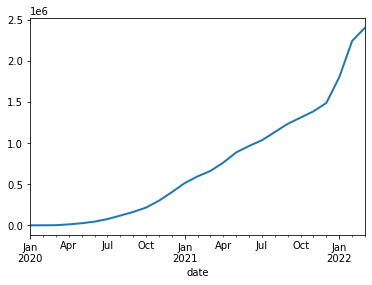

In [9]:
#   Plot it to check that it works
df_mthly['confirmed'].plot(linewidth=2)


In [10]:
#   Save monthly covid cases data
df_mthly.to_csv('../CSVs/covid_cases_mthly.csv')


In [11]:
# Assign X (data) and y (target)

X = df_mthly[['deaths', 'recovered', 'active']]
y = df_mthly["confirmed"].values.reshape(-1, 1)
print(X.shape, y.shape)


(27, 3) (27, 1)


In [12]:
# Split the data into training and testing

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [13]:
# Create a StandardScater model and fit it to the training data
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)


In [14]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)


In [15]:
# Create a LinearRegression model and fit it to the scaled training data

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)


LinearRegression()

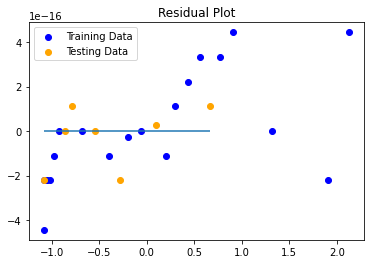

In [16]:
# Make predictions using a fitted model
# Plot the difference between the model predicted values and actual y values, versus the model predicted values
# Hint: You can predict values of X training and testing data using the model.predict() method on a fitted model

predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), y_train_scaled - model.predict(X_train_scaled), c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), y_test_scaled - model.predict(X_test_scaled), c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()


In [17]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")


MSE: 1.771855548836257e-32, R2: 1.0


In [18]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")


MSE: 0.00024973684918922726, R2: 0.9992231697506446


In [19]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")


MSE: 2.530201169458437e-06, R2: 0.9999921295683365


In [20]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")


MSE: 0.00036160994090603623, R2: 0.9988751778462993


## Comparison of the performance for the Polynomial Regression model on Covid data
#### Polynomial regression provides the relationship between the dependent variable Y and the independent variable X and is
#### modeled as 2nd, 3rd, 4th, and 5th-degree polynomial in x. 

In [21]:
#   Assign X (data) and y (target)

X = df_mthly[['deaths', 'recovered', 'active']]
Y = df_mthly["confirmed"].values.reshape(-1, 1)
print(X.shape, y.shape)


(27, 3) (27, 1)


In [22]:
#   Set up independent variable training data
X_train = df_mthly.loc['2020-01-31' : '2021-12-31']
X_train


,confirmed,deaths,recovered,active
date,,,,
2020-01-31,2.102131e+01,0.485792,0.471585,2.006393e+01
2020-02-29,3.107946e+02,8.814585,68.478048,2.335020e+02
2020-03-31,1.555081e+03,70.267936,456.410189,1.028403e+03
2020-04-30,1.151036e+04,804.109654,2862.488342,7.843762e+03
2020-05-31,2.548386e+04,1761.588577,9261.222281,1.446105e+04
2020-06-30,4.481877e+04,2544.576321,21235.772678,2.103842e+04
2020-07-31,7.590138e+04,3401.639521,42102.394853,3.039735e+04
2020-08-31,1.181844e+05,4417.543804,73831.566191,3.993525e+04
2020-09-30,1.626642e+05,5377.180510,109818.552095,4.746843e+04


In [23]:
#   Set up dependent variable training data
Y_train = df_mthly.loc['2020-01-31' : '2021-12-31']
Y_train


,confirmed,deaths,recovered,active
date,,,,
2020-01-31,2.102131e+01,0.485792,0.471585,2.006393e+01
2020-02-29,3.107946e+02,8.814585,68.478048,2.335020e+02
2020-03-31,1.555081e+03,70.267936,456.410189,1.028403e+03
2020-04-30,1.151036e+04,804.109654,2862.488342,7.843762e+03
2020-05-31,2.548386e+04,1761.588577,9261.222281,1.446105e+04
2020-06-30,4.481877e+04,2544.576321,21235.772678,2.103842e+04
2020-07-31,7.590138e+04,3401.639521,42102.394853,3.039735e+04
2020-08-31,1.181844e+05,4417.543804,73831.566191,3.993525e+04
2020-09-30,1.626642e+05,5377.180510,109818.552095,4.746843e+04


In [24]:
#   Set up testing data
X_test = df_mthly.loc['2022-01-31' : '2022-03-31']
X_test


,confirmed,deaths,recovered,active
date,,,,
2022-01-31,1.800798e+06,30157.671426,0.0,1.770641e+06
2022-02-28,2.241300e+06,31685.461163,0.0,2.209615e+06
2022-03-31,2.403665e+06,32573.405464,0.0,2.371091e+06


In [25]:
#   Set up dependent variable training data
Y_test = df_mthly.loc['2022-01-31' : '2022-03-31']
Y_test


,confirmed,deaths,recovered,active
date,,,,
2022-01-31,1.800798e+06,30157.671426,0.0,1.770641e+06
2022-02-28,2.241300e+06,31685.461163,0.0,2.209615e+06
2022-03-31,2.403665e+06,32573.405464,0.0,2.371091e+06


In [26]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=5)
# transforms the existing features to higher degree features.
X_train_poly = poly_features.fit_transform(X_train)
# fit the transformed features to Linear Regression
poly_model = LinearRegression()
poly_model.fit(X_train_poly, Y_train)


LinearRegression()

In [27]:
# predicting on training data-set
y_train_predicted = poly_model.predict(X_train_poly)
# predicting on test data-set
y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
# predicting on test data-set
y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
# evaluating the model on training dataset
rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_predicted))
r2_train = r2_score(Y_train, y_train_predicted)
# evaluating the model on test dataset
rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_predict))
r2_test = r2_score(Y_test, y_test_predict)
print("The model performance for the training set")
print("-------------------------------------------")
print("RMSE of training set is {}".format(rmse_train))
print("R2 score of training set is {}".format(r2_train))

print("\n")

print("The model performance for the test set")
print("-------------------------------------------")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_test))


The model performance for the training set
-------------------------------------------
RMSE of training set is 1125.1000678344953
R2 score of training set is 0.9999507918224186


The model performance for the test set
-------------------------------------------
RMSE of test set is 1273753711514.784
R2 score of test set is -6580816940167107.0


#### Training set gives an almost perfect R2 0.99999 score and an acceptable RMSE error of 1,125 as it is using actual data
#### Testing set gives outlandish score for both R2 and RMSE
#### I think it's time to forget Polynomial Regression
#### We could spend an awful lot of time we can ill afford at this stage trying to reduce the errors
#### Whole research papers have been written on this and you a lot of time to try and absorb how it works


## Comparison of the performance for the ARIMA model on Covid data
#### Decided not to pursue this at this stage